# <p style="text-align: center;"> Advanced Biomedical Imaging Analysis: </p>
## <p style="text-align: center;"> The Road Toward Deep Learning: 
## <p style="text-align: center;"> Neuroimage Preprocessing and Postprocessing </p>

### <p style="text-align: center;"> Presented by Christian McDaniel </p>

# <p style="text-align: center;"> Background

# <p style="text-align: center;"> Background: 

## <p style="text-align: center;"> Magnetic Resonance-Based Imaging

Optical Imaging | X-Ray Imaging | Magnetic Resonance Imaging
 :-----:|:----:|:----:
![](https://aemstatic-ww1.azureedge.net/content/dam/VSD/print-articles/2014/06/insightf1-1406vsd.jpg) | ![](http://www.phenotypescreening.com/images/PSC-imaging-concept.png) | ![](https://www.howequipmentworks.com/wp-content/uploads/2015/01/yellow_section.gif)

# Magnetic Resonance Imaging

 Signal Generation and Reception   | Tissue Differentiation      
:------:|:------:
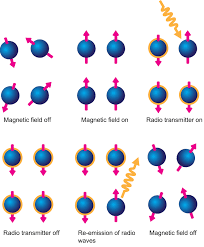 | <img src="http://www.sprawls.org/mripmt/MRI04/MRI%204-5.jpg" alt="contrast" width="400" />

# Magnetic Resonance Imaging - Signal Localization

Slice selection (Z-axis) | Phase Encoding (Y-axis) |  Frequency Encoding (X-axis)
:------------:|:--------------:|:----------:
<img src="https://static.cambridge.org/resource/id/urn:cambridge.org:id:binary:20170614045535012-0877:9781107706958:64323fig8_6.png?pub-status=live" alt="slice" width="300" /> | <img src="http://www.sprawls.org/mripmt/MRI09/MR%209-9.jpg" alt="phase" width="400" /> | ![](https://qph.fs.quoracdn.net/main-qimg-469528f82f58b9e29d7ac5c4320eb9a8) 

# Magnetic Resonance Imaging - Image Construction

K-Space  | Fourier Transform  
:---:|:----:
<img src="http://mriquestions.com/uploads/3/4/5/7/34572113/8323914_orig.gif" alt="kspace" width="500" /> | <img src="http://mriquestions.com/uploads/3/4/5/7/34572113/4062968_orig.png" alt="kspace" width="500" height="500" />

# Noise: MRI Artifacts

Signal Transmission - Zipper Effect | Signal Acquisition - Aliasing 
:------:|:-----:
![](https://www.auntminnieeurope.com/user/images/content_images/sup_mri/2015_06_01_12_44_02_823_2015_06_01_MRI-insider-zipper-artifact.jpg)  | <img src="http://www.revisemri.com/images/aliasedhead.jpg" alt="aliasing" width="300" height="100" />


# Noise: MRI Artifacts - Gradient-Related Artifacts

![](https://www.humanconnectome.org/storage/app/media/art/mr-preprocessing-fig1.png)

# Noise: MRI Artifacts - Magnetization

Ghosting | Susceptibility
:---:|:---:
![](http://mriquestions.com/uploads/3/4/5/7/34572113/3830667_orig.jpg) | ![](https://www.researchgate.net/profile/Joachim_Kettenbach/publication/6649032/figure/download/fig7/AS:277845931773956@1443255041013/Susceptibility-artifact-Two-manifestations-of-a-susceptibility-artifact-originating-from.png)

# Noise: MRI Artifacts - Magnetization

**Chemical Shift:**
![](http://mriquestions.com/uploads/3/4/5/7/34572113/6071647_orig.jpg)

# The acquisition physics are directly tied to the artifacts......



# The acquisition physics are directly tied to the artifacts......






# <p style="text-align: right ;">...... which are directly tied to the problematic processing

## E.g., _Hidden Cues: Deep Learning for Alzheimer's Disease_ (2016)

_  | tSNE
:---:|:---:
<p style="text-align: left;">+ Used tri-axial RAW MRI data <br><br> + Transfer learning from AlexNet <br><br> + data augmentation via mirror flip <br><br> + 66.51% accuracy re: classification of AD v. HC |!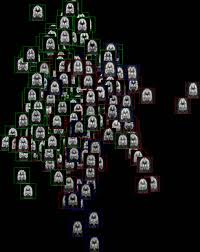

# Preprocessing

# Preprocessing

## Step 1: Dicom to Nifti

# Preprocessing

## Step 1: Dicom to Nifti

DICOM | NIFTI
:----:|:----:
Digital Imaging and Communications in Medicine | Neuroimaging Informatics Technology Initiative
Many volumes are taken for one image | Processing is concerned with the composite
The emphasis is acquisition and interchange standards | The emphasis is compactibility and interpretability

# Preprocessing

## Step 1: Dicom to Nifti 
### BIDS: Brain Imaging Data Structure 

![](https://media.springernature.com/full/nature-static/assets/v1/image-assets/sdata201644-f1.jpg)



```python
import os 
import subprocess

"""
Create a folder for each **subject**, then for each **modality**,
and then distinguish each imaging 'run'.
"""

# create list for a single modality
rawdiffs = list(rootr for rootr,dirnamesr,filenamesr in os.walk(subject)\
                if len(rootr.split('/'))==6 and 'DTI' in rootr.split('/')[3])

# generate the file structure and naming; and convert dcm to nii
for rawdiff in rawdiffs:
            run+=1
            newfn = sub_name+'_run-0{}_dwi'.format(run) # new filename
            newdir = os.path.join(main_dir,sub_name,'dwi/') # new path
            # perform bash command dcm2niix
            cmd = "dcm2niix -b y -o {} -f {} {}".format(newdir,newfn,rawdiff)
            process = subprocess.Popen(cmd.split(), stdout=subprocess.PIPE)
            output, error = process.communicate()
            # move the file
            if not os.path.exists(srcdata+sub_name):
                os.mkdir(srcdata+sub_name)
            os.rename(rawdiff,srcdata+sub_name+'/rawdcm_run-0{}/'.format(run))
        run=0
```

PPMI | BIDS
:----:|:----:
![](ppmi_data_strxr.png) | ![](make_bids_data_strxr.png)

In [13]:
"""
dcm2niix creates a json file with pertinent header information
"""
{
	"Modality": "MR",
	"MagneticFieldStrength": 3,
	"Manufacturer": "Siemens",
	"ManufacturersModelName": "TrioTim",
	"InstitutionName": "Baylor_College_of_Medicine",
	"DeviceSerialNumber": "4TUMzYL029kw",
	"PatientPosition": "HFS",
	"SoftwareVersions": "syngo_MR_B15",
	"MRAcquisitionType": "2D",
	"SeriesDescription": "DTI",
	"ProtocolName": "DTI",
	"ScanningSequence": "EP",
	"SequenceVariant": "SK_SP",
	"ScanOptions": "PFP_FS",
	"SequenceName": "_ep_b0",
	"ImageType": ["ORIGINAL", "PRIMARY", "M", "ND", "NORM", "MOSAIC"],
	"SeriesNumber": 3,
	"AcquisitionTime": "10:36:41.432500",
	"AcquisitionNumber": 1,
	"SliceThickness": 2,
	"SpacingBetweenSlices": 2,
	"SAR": 0.2452,
	"EchoTime": 0.088,
	"RepetitionTime": 9,
	"FlipAngle": 90,
	"PartialFourier": 0.75,
	"BaseResolution": 116,
	"ShimSetting": [
		14415,
		-12729,
		3293,
		400,
		-102,
		-700,
		-291,
		-99	],
	"TxRefAmp": 332.863,
	"PhaseResolution": 1,
	"ReceiveCoilName": "HeadMatrix",
	"PulseSequenceDetails": "%SiemensSeq%_ep2d_diff",
	"PercentPhaseFOV": 100,
	"PhaseEncodingSteps": 90,
	"AcquisitionMatrixPE": 116,
	"ReconMatrixPE": 116,
	"BandwidthPerPixelPhaseEncode": 23.618,
	"ParallelReductionFactorInPlane": 2,
	"EffectiveEchoSpacing": 0.000365005,
	"DerivedVendorReportedEchoSpacing": 0.00073001,
	"TotalReadoutTime": 0.0419756,
	"PixelBandwidth": 1595,
	"DwellTime": 2.7e-06,
	"PhaseEncodingDirection": "j-",
	"SliceTiming": [
		4.5175,
		0,
		4.6425,
		0.125,
		4.7675,
		0.25,
		4.895,
		0.3775,
		5.02,
		0.5025,
		5.145,
		0.6275,
		5.27,
		0.7525,
		5.395,
		0.8775,
		5.5225,
		1.005,
		5.6475,
		1.13,
		5.7725,
		1.255,
		5.8975,
		1.38,
		6.0225,
		1.505,
		6.15,
		1.6325,
		6.275,
		1.7575,
		6.4,
		1.8825,
		6.525,
		2.0075,
		6.65,
		2.1325,
		6.7775,
		2.26,
		6.9025,
		2.385,
		7.0275,
		2.51,
		7.1525,
		2.635,
		7.2775,
		2.76,
		7.405,
		2.8875,
		7.53,
		3.0125,
		7.655,
		3.1375,
		7.78,
		3.2625,
		7.905,
		3.3875,
		8.0325,
		3.515,
		8.1575,
		3.64,
		8.2825,
		3.765,
		8.4075,
		3.89,
		8.5325,
		4.015,
		8.66,
		4.14,
		8.785,
		4.2675,
		8.91,
		4.3925	],
	"ImageOrientationPatientDICOM": [
		1,
		-1e-16,
		0,
		1e-16,
		0.944949,
		-0.327218	],
	"InPlanePhaseEncodingDirectionDICOM": "COL",
	"ConversionSoftware": "dcm2niix",
	"ConversionSoftwareVersion": "v1.0.20180622 (JP2:OpenJPEG) GCC6.1.0"
}


{'AcquisitionMatrixPE': 116,
 'AcquisitionNumber': 1,
 'AcquisitionTime': '10:36:41.432500',
 'BandwidthPerPixelPhaseEncode': 23.618,
 'BaseResolution': 116,
 'ConversionSoftware': 'dcm2niix',
 'ConversionSoftwareVersion': 'v1.0.20180622 (JP2:OpenJPEG) GCC6.1.0',
 'DerivedVendorReportedEchoSpacing': 0.00073001,
 'DeviceSerialNumber': '4TUMzYL029kw',
 'DwellTime': 2.7e-06,
 'EchoTime': 0.088,
 'EffectiveEchoSpacing': 0.000365005,
 'FlipAngle': 90,
 'ImageOrientationPatientDICOM': [1, -1e-16, 0, 1e-16, 0.944949, -0.327218],
 'ImageType': ['ORIGINAL', 'PRIMARY', 'M', 'ND', 'NORM', 'MOSAIC'],
 'InPlanePhaseEncodingDirectionDICOM': 'COL',
 'InstitutionName': 'Baylor_College_of_Medicine',
 'MRAcquisitionType': '2D',
 'MagneticFieldStrength': 3,
 'Manufacturer': 'Siemens',
 'ManufacturersModelName': 'TrioTim',
 'Modality': 'MR',
 'ParallelReductionFactorInPlane': 2,
 'PartialFourier': 0.75,
 'PatientPosition': 'HFS',
 'PercentPhaseFOV': 100,
 'PhaseEncodingDirection': 'j-',
 'PhaseEncodingSte

In [9]:
import subprocess

def bash_command(string_cmd): 
    process = subprocess.Popen(string_cmd.split(), stdout=subprocess.PIPE)
    output, error = process.communicate()
    return output

In [12]:
# Let's check out our new nifty nifti image 
bash_command('fsleyes ./sub-05_run-01_dwi.nii')

b''

In [ ]:
# Produce b0's for 2 or more acquisitions
bash_command('fslroi sub-05_run-01_dwi sub-05_run-01_b0 0 1')
bash_command('fslroi sub-05_run-02_dwi sub-05_run-02_b0 0 1')
bash_command('fslroi sub-05_run-03_dwi sub-05_run-03_b0 0 1')

# merge the b0's
bash_command('fslmerge -t sub-05_run-01-02-03_b0 sub-05_run-01_b0 sub-05_run-02_b0 sub-05_run-03_b0')

### The acquisition parameters:

+ Each acquisition (image) has a phase encode direction and a readout time (image acquisition)

``` python
"TotalReadoutTime": 0.0419756,
"PhaseEncodingDirection": "j-",
```
+ Need at least two files that have opposing phase encode directions (along same axis) or different readout times


In [ ]:
# Write file containing acquisition parameters
bash_command('printf "0 -1 0 0.0419756\n0 -1 0 0.0419756\n 0 -1 0 0.0408244" > acq.txt')

In [ ]:
# run topup
bash_command('topup --imain=sub-05_run-01-02-03_b0 --datain=acq.txt --config=b02b0.cnf --out=sub-05_run-01-02-03_topup --iout=sub-05_run-01-02-03_b0_topup')

In [ ]:
# create mask
bash_command('fslmaths sub-05_run-01-02-03_b0_topup -Tmean sub-05_run-01-02-03_b0_topup')
bash_command('bet sub-05_run-01-02-03_b0_topup sub-05_run-01-02-03_b0_brain -m')

In [ ]:
# instruct fsl which slices belong to which acquisition parameters
bash_command('indx=""')
bash_command('for ((i=1; i<=65; i+=1)); do indx="$indx 1"; done')
bash_command('echo $indx > index.txt')

```python
# run eddy 

eddy --imain=sub-05_run-01_dwi --mask=sub-05_run-01-02-03_b0_brain_mask\
    --acqp=acq.txt --index=index.txt --bvecs=sub-05_run-01_dwi.bvec\
    --bvals=sub-05_run-01_dwi.bval --topup=sub-05_run-01-02-03_topup\
    --out=sub-05_run-01_eddycorrected
```

`eddy_cuda`:
+ basic eddy takes quite a long time to run
+ can be run on a GPU, but uses CUDA version 7.5

In [ ]:
bash_command('fsleyes sub-05_run-01_dwi.nii sub-05_run-02_dwi.nii sub-05_run-01_eddycorrected.nii.gz sub-05_run-01-02-03_b0_brain_mask.nii.gz sub-05_run-01-02-03_b0_brain.nii.gz sub-05_run-01-02-03_b0_topup.nii.gz sub-05_run-01-02-03_b0.nii.gz sub-05_run-03_dwi.nii')